## FOUNDATIONAL PROJECT 1

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
#!pip install tensorflow
#!pip install keras
from keras.optimizers import Adam
import statistics
import seaborn as sns
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_news = pd.read_csv("https://raw.githubusercontent.com/gitsim02/FoundationProject-1/main/Reliance_sentiment.csv")
df_news.head()

,date,title_senti_comp,news_senti_comp,avg_senti_comp
0,2016-08-01,0.0000,0.6369,0.320
1,2016-08-05,0.0000,0.7829,0.390
2,2016-08-18,0.0000,0.8402,0.420
3,2016-08-19,-0.4588,-0.7239,-0.590
4,2016-08-30,0.0000,0.8824,0.445


In [3]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              654 non-null    object 
 1   title_senti_comp  654 non-null    float64
 2   news_senti_comp   654 non-null    float64
 3   avg_senti_comp    654 non-null    float64
dtypes: float64(3), object(1)
memory usage: 20.6+ KB


In [4]:
df_price = pd.read_csv("https://raw.githubusercontent.com/gitsim02/FoundationProject-1/main/reliance_prices.csv")
df_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,...,SMA5,SMA9,SMA15,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,Volume_100k
0,2016-12-13,509.173553,515.612488,508.950653,515.018127,501.832367,4783826,-9.757507,-8.965027,-12.333130,...,506.711877,501.177117,497.654399,497.400968,510.925976,507.810375,503.683619,500.984710,501.394308,47.838
1,2016-12-14,515.018127,527.227417,514.225647,524.775635,511.339996,11140265,3.244202,-1.857422,4.853943,...,512.690204,504.575460,499.321924,497.541305,517.850805,513.465462,507.902022,503.958576,502.902781,111.403
2,2016-12-15,521.258972,528.787598,519.401611,521.531433,508.178925,8921708,-2.080261,-0.198120,-6.191284,...,515.949316,507.778436,501.488059,498.023402,519.691119,516.154119,510.627905,506.155183,504.104629,89.217
3,2016-12-16,521.060852,526.013916,521.060852,523.611694,510.205872,6895825,-2.674622,-0.074280,-12.506470,...,518.742841,511.262082,503.583201,498.571539,521.651407,518.639977,513.224663,508.337247,505.363150,68.958
4,2016-12-19,522.546753,528.465698,522.224854,526.286316,512.812012,6926943,2.303162,7.479065,-11.169128,...,522.244641,514.418274,506.089443,499.512618,523.968861,521.188757,515.836993,510.580880,506.713031,69.269


In [5]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1384 non-null   object 
 1   Open         1384 non-null   float64
 2   High         1384 non-null   float64
 3   Low          1384 non-null   float64
 4   Close        1384 non-null   float64
 5   Adj Close    1384 non-null   float64
 6   Volume       1384 non-null   int64  
 7   1d_diff      1384 non-null   float64
 8   5d_diff      1384 non-null   float64
 9   10d_diff     1384 non-null   float64
 10  SMA3         1384 non-null   float64
 11  SMA5         1384 non-null   float64
 12  SMA9         1384 non-null   float64
 13  SMA15        1384 non-null   float64
 14  SMA30        1384 non-null   float64
 15  EMA3         1384 non-null   float64
 16  EMA5         1384 non-null   float64
 17  EMA9         1384 non-null   float64
 18  EMA15        1384 non-null   float64
 19  EMA30 

In [6]:
df_news['date'] = pd.to_datetime(df_news.date)
df_price['Date'] = pd.to_datetime(df_price.Date)

In [7]:
df_combined = pd.merge(left=df_price,right=df_news,how="left",left_on = 'Date',right_on='date')

df_combined.drop(['date'],axis=1,inplace=True)

df_combined.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,...,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,Volume_100k,title_senti_comp,news_senti_comp,avg_senti_comp
1379,2022-07-11,2376.500000,2428.800049,2370.000000,2423.899902,2423.899902,6390604,3.449951,1.649902,3.500000,...,2574.979997,2411.709763,2417.687410,2439.967735,2472.975022,2523.815943,63.906,NaN,NaN,NaN
1380,2022-07-12,2404.000000,2439.699951,2404.000000,2420.449951,2420.449951,4974502,42.899902,-16.650146,-1.050049,...,2567.906665,2416.079857,2418.608257,2436.064178,2466.409388,2517.147169,49.745,NaN,NaN,NaN
1381,2022-07-13,2427.300049,2434.000000,2373.000000,2377.550049,2377.550049,6564435,-19.599854,-125.449951,-41.649902,...,2559.375000,2396.814953,2404.922187,2424.361352,2455.301971,2508.140903,65.644,0.0,-0.0772,-0.04
1382,2022-07-14,2388.000000,2433.949951,2376.949951,2397.149902,2397.149902,7831798,-4.650146,-89.150146,-59.950195,...,2548.469995,2396.982428,2402.331426,2418.919062,2448.032962,2500.980193,78.318,0.0,0.4703,0.24
1383,2022-07-15,2415.000000,2415.000000,2383.100098,2401.800049,2401.800049,4431880,-20.449951,-101.300049,-107.649902,...,2535.879997,2399.391238,2402.154300,2415.495260,2442.253848,2494.581474,44.319,NaN,NaN,NaN


In [8]:
df_combined.isna().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
1d_diff               0
5d_diff               0
10d_diff              0
SMA3                  0
SMA5                  0
SMA9                  0
SMA15                 0
SMA30                 0
EMA3                  0
EMA5                  0
EMA9                  0
EMA15                 0
EMA30                 0
Volume_100k           0
title_senti_comp    846
news_senti_comp     846
avg_senti_comp      846
dtype: int64

In [9]:
# Impute all the NaN with 0 as the sentiment score.

df_combined.fillna(0.0,inplace=True)

df_combined.isna().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
1d_diff             0
5d_diff             0
10d_diff            0
SMA3                0
SMA5                0
SMA9                0
SMA15               0
SMA30               0
EMA3                0
EMA5                0
EMA9                0
EMA15               0
EMA30               0
Volume_100k         0
title_senti_comp    0
news_senti_comp     0
avg_senti_comp      0
dtype: int64

## Time Series Forecasting



In [10]:
# convert it to the datetime64[ns] data type

df_combined['Date'] = pd.to_datetime(df_combined.Date)

df_combined.Date.min(),df_combined.Date.max()

(Timestamp('2016-12-13 00:00:00'), Timestamp('2022-07-15 00:00:00'))

In [11]:
df_combined.Date.max()-df_combined.Date.min()

Timedelta('2040 days 00:00:00')

In [12]:
df_combined.set_index('Date',inplace=True)

df_combined.head()

,Open,High,Low,Close,Adj Close,Volume,1d_diff,5d_diff,10d_diff,SMA3,...,SMA30,EMA3,EMA5,EMA9,EMA15,EMA30,Volume_100k,title_senti_comp,news_senti_comp,avg_senti_comp
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-13,509.173553,515.612488,508.950653,515.018127,501.832367,4783826,-9.757507,-8.965027,-12.333130,511.146505,...,497.400968,510.925976,507.810375,503.683619,500.984710,501.394308,47.838,0.0,0.000000,0.000000
2016-12-14,515.018127,527.227417,514.225647,524.775635,511.339996,11140265,3.244202,-1.857422,4.853943,516.190358,...,497.541305,517.850805,513.465462,507.902022,503.958576,502.902781,111.403,0.0,0.730367,0.366667
2016-12-15,521.258972,528.787598,519.401611,521.531433,508.178925,8921708,-2.080261,-0.198120,-6.191284,520.441732,...,498.023402,519.691119,516.154119,510.627905,506.155183,504.104629,89.217,0.0,0.000000,0.000000
2016-12-16,521.060852,526.013916,521.060852,523.611694,510.205872,6895825,-2.674622,-0.074280,-12.506470,523.306254,...,498.571539,521.651407,518.639977,513.224663,508.337247,505.363150,68.958,0.0,0.000000,0.000000
2016-12-19,522.546753,528.465698,522.224854,526.286316,512.812012,6926943,2.303162,7.479065,-11.169128,523.809814,...,499.512618,523.968861,521.188757,515.836993,510.580880,506.713031,69.269,0.0,0.000000,0.000000


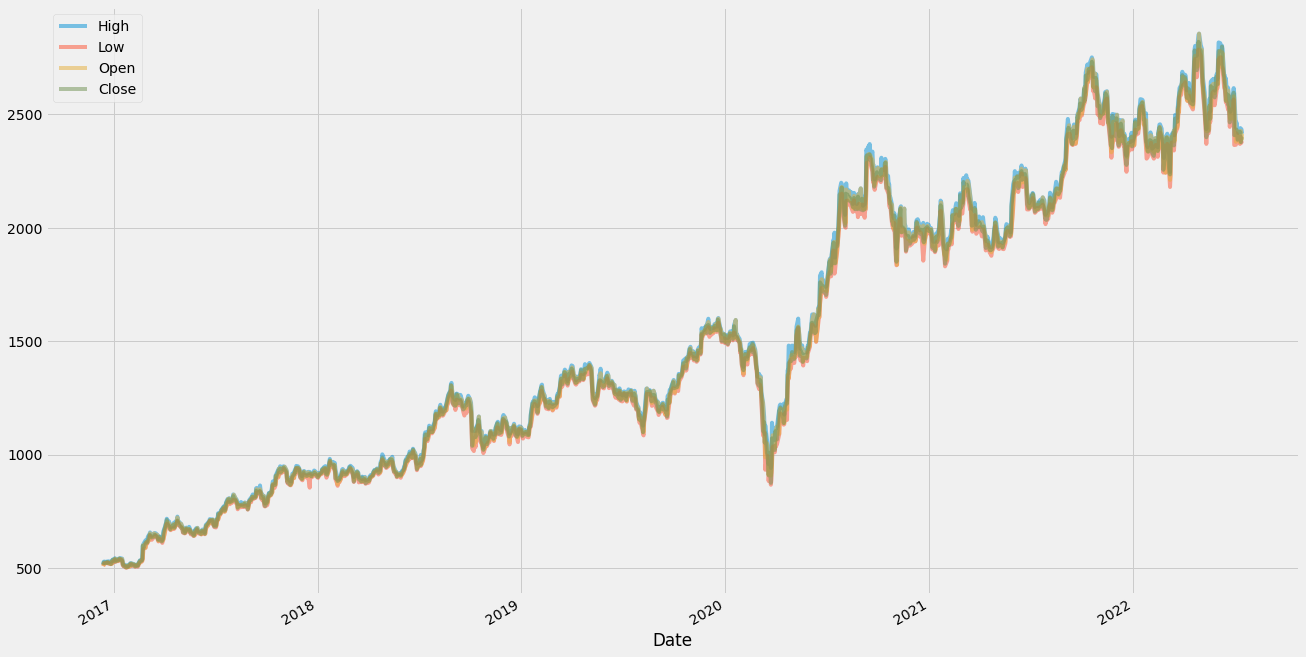

In [14]:
df_combined[['High','Low','Open','Close']].plot(figsize = (20, 12), alpha = 0.5);

The four had almost same behaviour throughout time.
Based on this assumption in this project, we will only focus on one of them 'High' in order to build a model which could predict future values.

Firstly, we will demonstrate if the time-series problem corresponds to a Non-Stationary type, which characterizes for having:

- Non-constant variance
- Non-constant mean
- Seasonality
- High autocorrelation

There are four well known ways to evaluate if the series meets the criteria just mentioned, these corresponds to:

- Sequence visualization.
- Histogram, Autocorrelation and Partial Aurocorrelation plots
- Statistical summary of chunks
- Adfuller test

## Evaluating Stationarity:

The following histogram plot should have a uniform distribution meaning non-constant mean or 'trend':

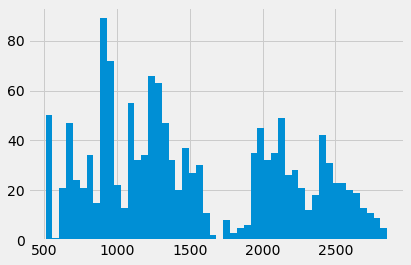

In [16]:
df_combined.High.hist(bins=50);

We can't assume a uniform nor normal distribution in the plot above, because of that the statistical summary can helps us more, for this we will split the data into 10 chunks and compute mean and variance of each one.

In [17]:
np.round(df_combined.shape[0]/10,0)

138.0

In [18]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df_combined['High'].iloc[(i*138):(i*138)+138].mean())
    std.append(stdev(df_combined['High'].iloc[(i*138):(i*138)+138]))

pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,618.141721,73.354977
1,860.117596,67.454233
2,973.668423,76.949434
3,1174.754717,72.281221
4,1292.551884,60.744464
5,1406.788601,162.102458
6,1943.824037,295.129467
7,2023.334413,77.385269
8,2360.411586,200.246806
9,2539.944557,142.108727


Above we see how both measures are clearly different in each chunk. However looking at the plot we could assume a constant variance as the ripple in the curve, but without a doubt trend is the most outstanding feature.

Until now can assume it's a non-stationary series. But to know more about it we will evaluate two other methods.


Seasonal decomposition is a function from statsmodels library which allows us to decompose the series into trend, seasonal and residual, either additive or multiplicative

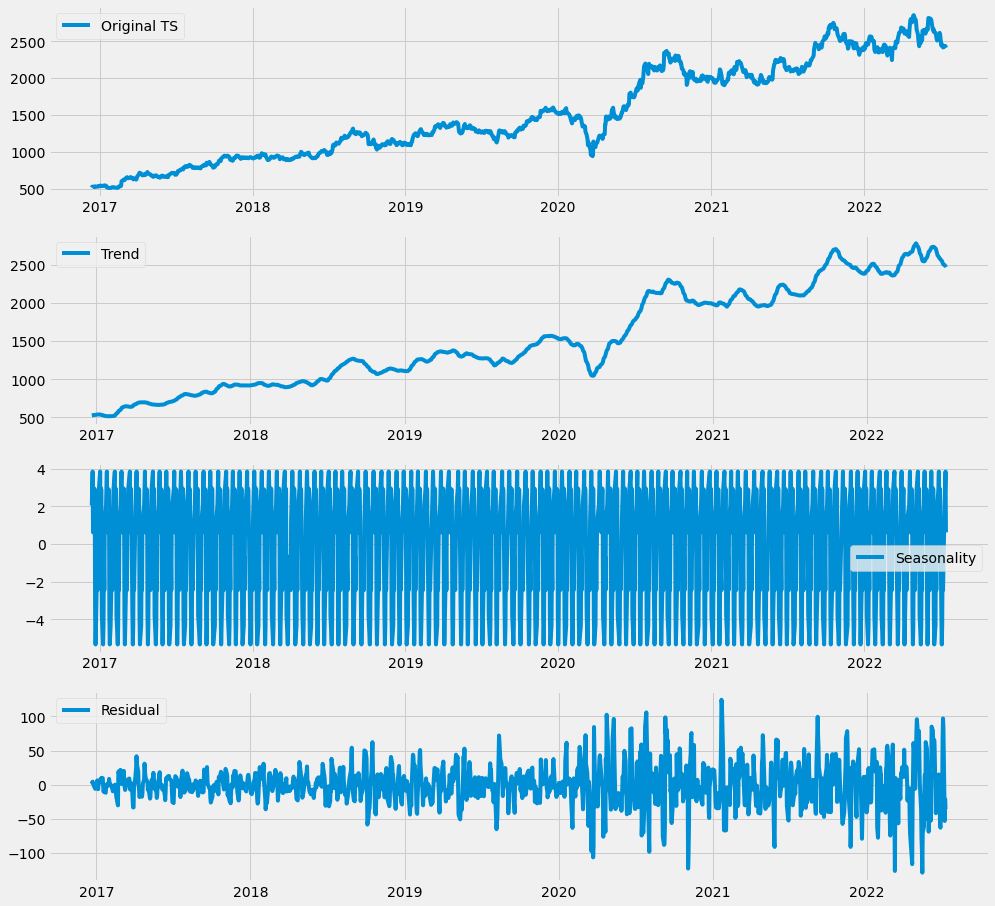

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_add=seasonal_decompose(df_combined['High'], model='additive', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df_combined['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best');

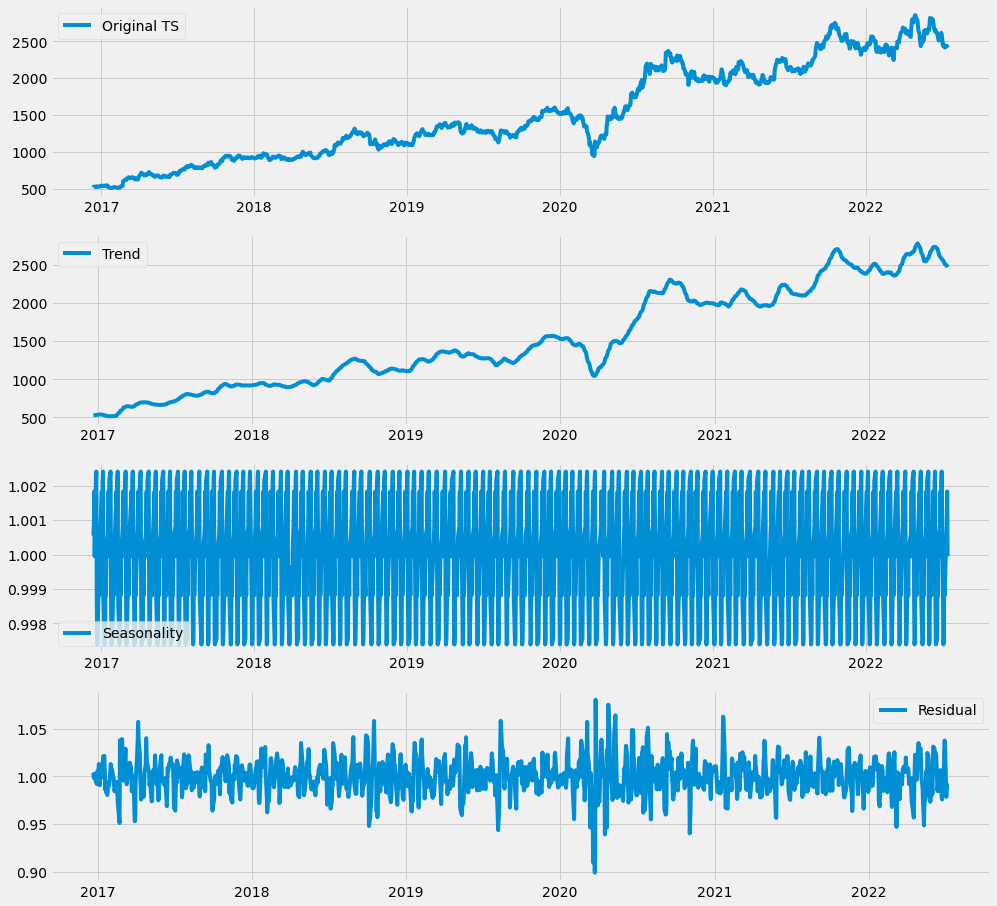

In [20]:
decompose_mul=seasonal_decompose(df_combined['High'], model='multiplicative', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df_combined['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best');

Looking carefully to the original curve we can say the additive decomposition makes more sense as the trend does not seem to be changing by the multiplication with seasonal component

Rather every component seems to being added up to create the original curve.

Independent of this there is a trend and seasonal component.

Below we can see the ACF and PACF plots:

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

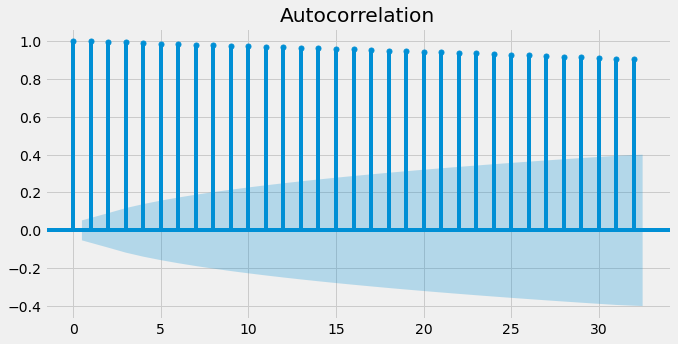

In [22]:
plt.rc("figure", figsize=(10,5))
plot_acf(df_combined['High'])
print()


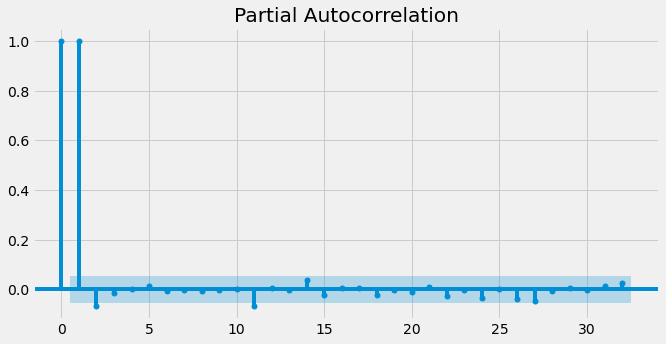

In [23]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df_combined['High'])
print()

Finally, we will make the Augmented Dickey-Fuller test, using 5% as significance level and declaring the following hypothesis:

- H0= Series corresponds to non-stationary type.
- H1= Series corresponds to stationary type.

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
result = adfuller(df_combined['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.033713
p-value: 0.740771
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


As p-value is greater than 0.05 we fail to reject the null hypothesis, therefore there is not enough evidence to reject that we are working with a non-stationary series. Let's apply the log transformation to the series and test again.

In [26]:
from numpy import log
result = adfuller(log(df_combined['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.769665
p-value: 0.395623
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


Based on every method applied we can endorse the serie clearly corresponds to a non-stationary type, which means that we have to convert this to stationary by using filters and complex transformations.

However, deep learning approaches can lead us to build models which takes into account all of these characteristics and predict future values modestly, but as disadvantage it would take significantly more time to train such models.

## Modeling:

Firstly, we will define a new dataset equal to the existing one, but omitting the last four records, later we will use the model to predict such values.

In [27]:
new_df=df_combined['High'].iloc[:-4]

We define the length of the training set as 80% of the total records 

In [28]:
#!pip install python-math
import math
train_len = math.ceil(len(new_df)*0.8)
train_len

1104

Let's use 10 as a random window to be used in the model to build:

In [29]:
window=10

The following lines create the training sets, as we now the first row takes the first 10 time steps and then the second row takes time steps shifted in one and so on and so forth:

In [30]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [31]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

Reshaping the training set to (number of records-window, number of time steps, 1):

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1094, 10, 1)

In [33]:
X_train

array([[[ 515.61248779],
        [ 527.22741699],
        [ 528.78759766],
        ...,
        [ 526.33587646],
        [ 529.45629883],
        [ 527.99511719]],

       [[ 527.22741699],
        [ 528.78759766],
        [ 526.01391602],
        ...,
        [ 529.45629883],
        [ 527.99511719],
        [ 528.53997803]],

       [[ 528.78759766],
        [ 526.01391602],
        [ 528.46569824],
        ...,
        [ 527.99511719],
        [ 528.53997803],
        [ 529.753479  ]],

       ...,

       [[1963.44995117],
        [2002.59997559],
        [2016.44995117],
        ...,
        [1979.5       ],
        [1993.        ],
        [2105.        ]],

       [[2002.59997559],
        [2016.44995117],
        [2010.90002441],
        ...,
        [1993.        ],
        [2105.        ],
        [2191.69995117]],

       [[2016.44995117],
        [2010.90002441],
        [2009.59997559],
        ...,
        [2105.        ],
        [2191.69995117],
        [2202.        ]]

The following is the first model to be used, this is relatively simple with one LSTM layer with relu activation function and one hidden fully connected layer, the optimizer used is Adam, number of epochs=10, batch_size=10 and loss function=Mean squared error:

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [35]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0);

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


Creating the validation set using same logic as training:

In [36]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [37]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [38]:
X_val.shape, Y_val.shape

((276, 10, 1), (276,))

Now that our validation set has the correct shape we can use it in the model to predict the next value.

In [39]:
prediction = model.predict(X_val)

9/9 [==============================] - 1s 4ms/step


In [40]:
len(prediction), len(Y_val)

(276, 276)

As our prediction and actual values have the same shape we can use these sets to compute the error metrics, in this case we will use RMSE.

In [41]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

9/9 [==============================] - 0s 5ms/step
Train rmse: 51.963638491261264
Validation rmse: 94.23277893089652


Both errors are high, if we specifically see the validation one we could say it's too much and we aim to improve this as we build a robust model in the next steps.

Below is a table which merged the actual and predicted values, therefore we can see for each record how differ these two and have an idea of how sidetracked we currently are.

In [42]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2021-06-03,2250.000000,2194.062012
2021-06-04,2216.449951,2216.533203
2021-06-07,2242.000000,2137.404785
2021-06-08,2227.149902,2123.896240
2021-06-09,2221.000000,2106.849121
...,...,...
2022-07-05,2464.899902,2511.610352
2022-07-06,2441.949951,2502.264404
2022-07-07,2433.250000,2494.190430


Below we can see a simple plot showing both curves, in which clearly there is a difference and a sort of shift to the right or delay in the prediction curve.

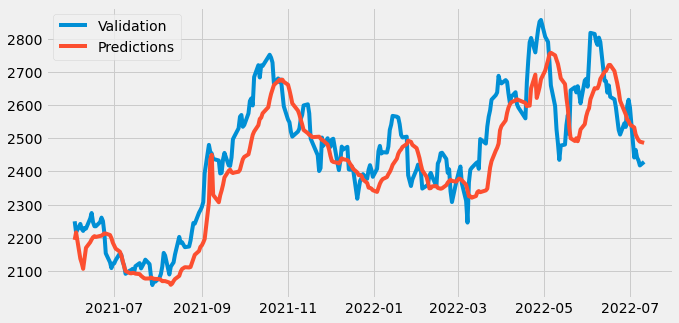

<Figure size 1152x576 with 0 Axes>

In [43]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.figure(figsize=(16,8))
plt.show()

Finally, the plot showing training, validation and prediction curves:

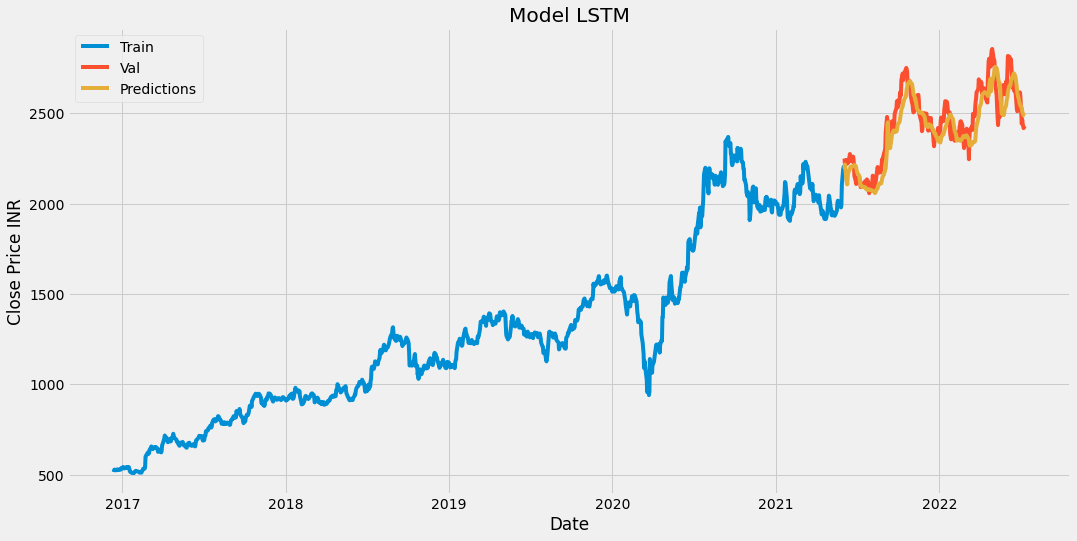

In [44]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

## Predicting 'future' values:

As we have values until 11-07-2022 we can predict the next one using the model built and compare the outcome with the actual value saved in the original dataframe 'df_combined':

In [45]:
last_10_days=new_df[-10:].values
X_test=[]
X_test.append(last_10_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

1/1 [==============================] - 0s 34ms/step
[[2478.042]]


Now, let's find the corresponding actual value in df:

In [46]:
df_combined['High'].iloc[-4]

2439.699951171875

The difference is about INR 71.7 and the model seems to be working very good.

In [47]:
df_combined['High'].iloc[-4]-pred_price

array([[-38.34204]], dtype=float32)

Predicting 4 future values:

In [48]:
df_combined.High.tail(14)

Date
2022-06-28    2533.949951
2022-06-29    2597.000000
2022-06-30    2615.899902
2022-07-01    2592.000000
2022-07-04    2442.000000
2022-07-05    2464.899902
2022-07-06    2441.949951
2022-07-07    2433.250000
2022-07-08    2418.000000
2022-07-11    2428.800049
2022-07-12    2439.699951
2022-07-13    2434.000000
2022-07-14    2433.949951
2022-07-15    2415.000000
Name: High, dtype: float64

Above, the last 4 values correspond to the actual values we want to predict, and the time steps used does not comprehend these rather will be used the predicted ones as we run the model.

As we predicted one value (pred_price) the time steps used to predict a new one will take the last 9 of new_df and pred_price, as follows:

In [ ]:
last_9_days=new_df[-9:].values
X_test=[]
X_test=np.append(last_9_days,pred_price)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price2=model.predict(X_test)
print(pred_price2)

Nice!, let's see what was the actual value:

In [ ]:
df_combined['High'].iloc[-3]

This time the difference was:

In [ ]:
df_combined['High'].iloc[-3]-pred_price2

To compute a new prediction let's use the same logic as before:

In [ ]:
last_8_days=new_df[-8:].values
X_test=[]
X_test=np.append(last_8_days,pred_price)
X_test=np.append(X_test,pred_price2)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price3=model.predict(X_test)
print(pred_price3)

Actual value:

In [ ]:
df_combined['High'].iloc[-2]

Difference:

In [ ]:
df_combined['High'].iloc[-2]-pred_price3

In [ ]:
last_7_days=new_df[-7:].values
X_test=[]
X_test=np.append(last_7_days, pred_price)
X_test=np.append(X_test, pred_price2)
X_test=np.append(X_test, pred_price3)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price4=model.predict(X_test)
print(pred_price4)

In [ ]:
df_combined['High'].iloc[-1]

In [ ]:
df_combined['High'].iloc[-1]-pred_price4

Now, let's see the four actual and predicted future values:

In [ ]:
df_combined.High.iloc[-4], df_combined.High.iloc[-3], df_combined.High.iloc[-2], df_combined.High.iloc[-1]

In [ ]:
pred_price, pred_price2, pred_price3, pred_price4

The following code will help us visualize these values in a table and plot:

In [ ]:
actual_prices=np.array([df_combined.High.iloc[-4], df_combined.High.iloc[-3], df_combined.High.iloc[-2], df_combined.High.iloc[-1]])
pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)])

In [ ]:
actual_prices, pred_prices

In [ ]:
data={'Actual values':[df_combined.High.iloc[-4],df_combined.High.iloc[-3],df_combined.High.iloc[-2],df_combined.High.iloc[-1]],
      'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)]}

pd.DataFrame(data, index=['2022-07-12','2022-07-13','2022-07-14','2022-07-15'])

In [ ]:
fut=pd.DataFrame(data, index=['2022-07-12','2022-07-13','2022-07-14','2022-07-15']).plot()
fut.set(ylim=(2400,2600))

The plot above shows how sidetracked our prediction is from the actual values, this will impact our conclussion about complexity of model vs reliable forecasting, now will be computed the correspoding RMSE to see this difference quantified:

In [ ]:
np.round(np.sqrt(mean_squared_error(actual_prices, pred_prices)),2)